### By : S Nandini

### TSF : Data Science and business analytics Internship
#### GRIP TASK - 1: Prediction Using Supervised ML 
#### Problem Statement: Predict the percentage of a student based on the no. of study hours.
#### What will be predicted score if a student studies for 9.25 hrs/day ?

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

### Importing dataset

In [2]:
student_data = pd.read_csv("http://bit.ly/w-data")
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


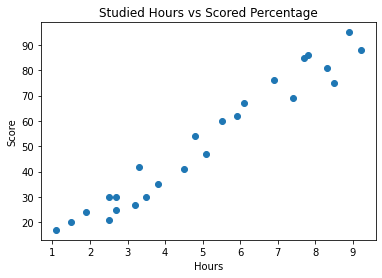

In [5]:
# Plotting Scatter Graph to see relationship between input label(x) and output label(y).
x = student_data['Hours']
y = student_data['Scores']

plt.title('Studied Hours vs Scored Percentage')
plt.xlabel('Hours')
plt.ylabel('Score')

plt.scatter(x,y)


Constructed Scatterplot to examine the type of correlation:
1. There is a postive correlation.
2. In Scatter plot,As numbers of studied hours increases there is a increase in percentage scored.

### Splitting data into input and output

In [6]:
X = student_data.iloc[:,:-1].values
y = student_data.iloc[:,-1:].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


### Train & Test Split
Based on X_train and Y_train model is trying to build patterns.
If model identified patterns very well, it can predict right answers in the future.

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)


### Training Algorithm
Calling the Algorithm & training

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

### Coefficients- Intercept

In [9]:
print('Coefficients',regr.coef_)
print('Intercepts',regr.intercept_)

Coefficients [[9.91065648]]
Intercepts [2.01816004]


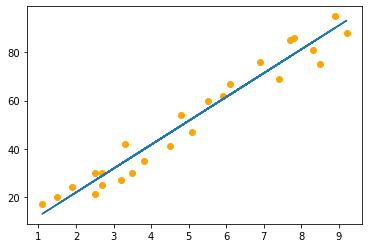

In [10]:
h = regr.coef_*X + regr.intercept_
plt.scatter(X,y,color = 'orange')
plt.plot(X,h)

### Prediction
Testing the algorithm - Testing Accuracy

In [11]:
y_pred = regr.predict(X_test)

In [12]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### Comparing actual(y_test) vs predicted(y_pred)


In [13]:
a=X_test.reshape(5,)
b=y_test.reshape(5,)
c=y_pred.reshape(5,)
data = pd.DataFrame({"Study_hours":a,'Actual_Score':b,'Predicted_Score': c})
data

,Study_hours,Actual_Score,Predicted_Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/day ?

In [19]:
hours = [[9.25]]
Score = regr.predict(hours).reshape(1,)
print(f"If a student studies for 9.25 hours a day,they will score {Score[0]} % marks")

If a student studies for 9.25 hours a day,they will score 93.69173248737539 % marks


### Evaluation of model

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
print("Coefficient of Determination:",r2_score(y_test, y_pred)) 
print("MSE:",mean_squared_error(y_test, y_pred))

Coefficient of Determination: 0.9454906892105354
MSE: 21.598769307217456


 R2 Score is 94.54%                                                                                                             

In [21]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = regr, X = X,\
     y = y) #Cross validation calculates R-squared metric
print("Accuracy Mean {} Accuracy Variance {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.9180771341891051 Accuracy Variance 0.06877822891279664


### Thank You